# Visualizing Ductal Shape
______________
______________

In [1]:
# std::vector<std::vector<double>> generate_boundary_shape(double a, double b, double amp, int freq, int num_points){

# 	std::vector<std::vector<double>> pts;
# 	pts.reserve(num_points);
    
# 	// Generating points for a deformed ellipse like shape
#     for (int i = 0; i < num_points; i++) {
        
#         double theta = 2.0 * M_PI * i / (num_points - 1);
        
#         double r_x = a * (1.0 + amp * cos(freq * theta));
#         double r_y = b * (1.0 + amp * sin(freq * theta));
#         double x = r_x * cos(theta);
#         double y = r_y * sin(theta);

#         pts.push_back({ x, y, 0.0 });
#     }
#     return pts;
# }

import matplotlib.pyplot as plt
import numpy as np

def generate_boundary_shape(a, b, amp, freq, num_points):
    pts = []
    
    # Generating points for a deformed ellipse like shape
    for i in range(num_points):
        theta = 2.0 * np.pi * i / (num_points - 1)
        
        r_x = a * (1.0 + amp * np.cos(freq * theta))
        r_y = b * (1.0 + amp * np.sin(freq * theta))
        x = r_x * np.cos(theta)
        y = r_y * np.sin(theta)

        pts.append([x, y, 0.0])
    
    return pts

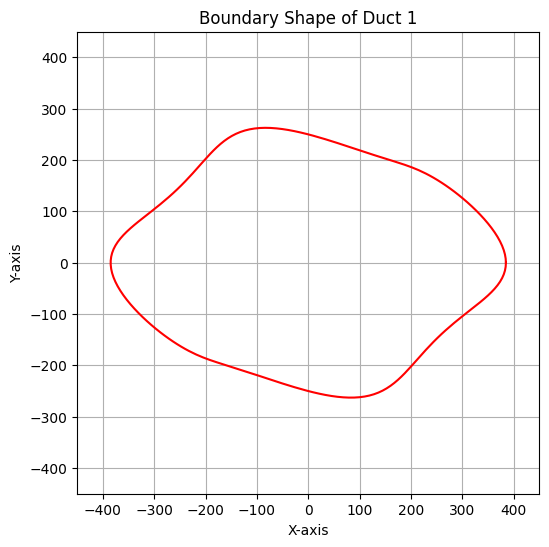

In [2]:
duct1_pts = generate_boundary_shape(350, 250, 0.1, 4, 200)

fig, ax = plt.subplots(figsize=(6, 6))

# plot as a plain line: no marker, just a solid linestyle
ax.plot(
    [p[0] for p in duct1_pts],
    [p[1] for p in duct1_pts],
    linestyle='-',       # solid line
    marker=None,         # no markers at the points
    linewidth=1.5,       # you can adjust line width
    color='red'
)

# set fixed axes limits
ax.set_xlim(-450, 450)
ax.set_ylim(-450, 450)

ax.set_aspect('equal', adjustable='box')  # keep x/y scales the same
ax.set_title('Boundary Shape of Duct 1')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True)

plt.show()

# Duct 2
______

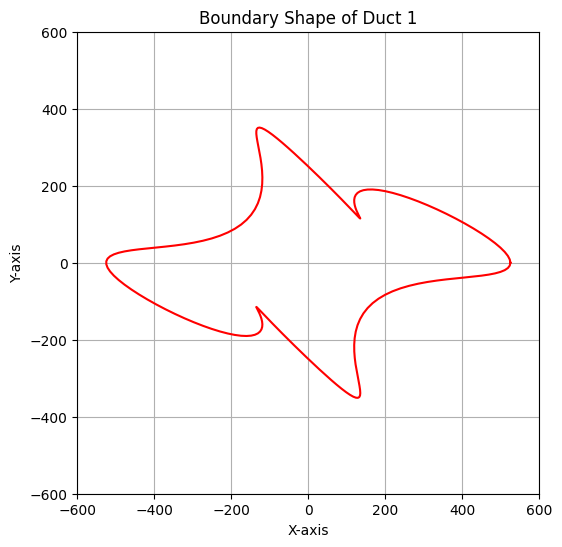

In [3]:

duct2_pts = generate_boundary_shape(350,250,.5,4,200)

fig, ax = plt.subplots(figsize=(6, 6))

# plot as a plain line: no marker, just a solid linestyle
ax.plot(
    [p[0] for p in duct2_pts],
    [p[1] for p in duct2_pts],
    linestyle='-',       # solid line
    marker=None,         # no markers at the points
    linewidth=1.5,       # you can adjust line width
    color='red'
)

# set fixed axes limits
ax.set_xlim(-600, 600)
ax.set_ylim(-600, 600)

ax.set_aspect('equal', adjustable='box')  # keep x/y scales the same
ax.set_title('Boundary Shape of Duct 1')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True)

plt.show()

# Duct 3
_______


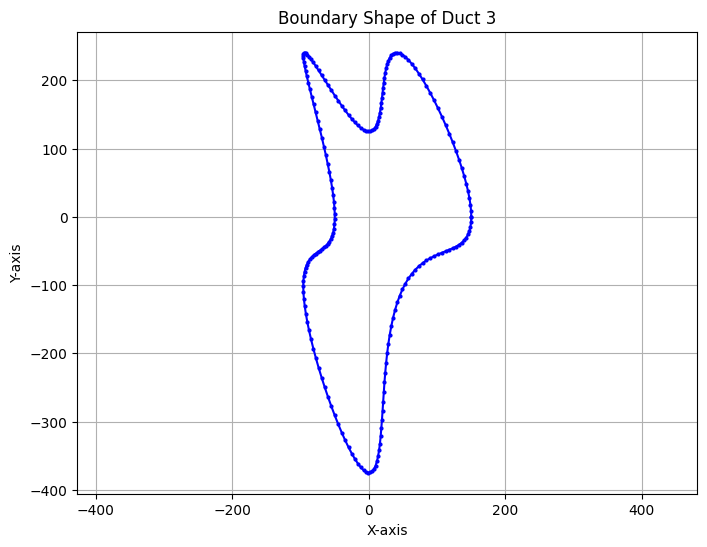

In [4]:
duct3_pts = generate_boundary_shape(100,250,.5,3,200)

plt.figure(figsize=(8, 6))
plt.plot([p[0] for p in duct3_pts], [p[1] for p in duct3_pts], marker='o', markersize=2, linestyle='-', color='blue')
plt.title('Boundary Shape of Duct 3')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid()

____
____

# Testing the is_inside function

In [5]:
# bool is_inside(double x, double y, const std::vector<std::vector<double>>& BM_pts) {
# 	// std::cout << "We are inside the is_inside function!!!" << std::endl;
# 	// std::cout << "Checking if point (" << x << ", " << y << ") is inside the polygon." << std::endl;
	
# 	bool inside = false;
# 	int Np = (int)BM_pts.size();

# 	for(int k=0; k<Np; ++k) {                                         // Looping through each edge of the polygon

# 		double x1 = BM_pts[k][0], y1 = BM_pts[k][1];           
# 		double x2 = BM_pts[(k+1)%Np][0], y2 = BM_pts[(k+1)%Np][1];    // (x1,y1) and (x2,y2) are the endpoints of the edge

# 		// Check if horizontal ray intersects the edge between (x1,y1) and (x2,y2)
# 		// 
# 		if(((y1 > y) != (y2 > y)) ) {                                  //This should handle edges cases now

# 			double xint = x1 + (y - y1)*(x2 - x1)/(y2 - y1);           // Note here xint is the x-coordinate of the intersection point of the horizontal ray with the edge
			
# 			if(x < xint) inside = !inside;                             // Reverse logic: ray extends to the right
# 		}
# 	}
# return inside;
# };

def is_inside(x, y, BM_pts):
    inside = False 
    Np = len(BM_pts)

    for k in range(Np):  # Looping through each edge of the polygon
        x1, y1 = BM_pts[k][0], BM_pts[k][1]
        x2, y2 = BM_pts[(k + 1) % Np][0], BM_pts[(k + 1) % Np][1]

        if ((y1 > y) != (y2 > y)):  # Check if horizontal ray intersects the edge
            xint = x1 + (y - y1) * (x2 - x1) / (y2 - y1)

            if x < xint: 
                inside = not inside

    return inside



_______
# Test 1

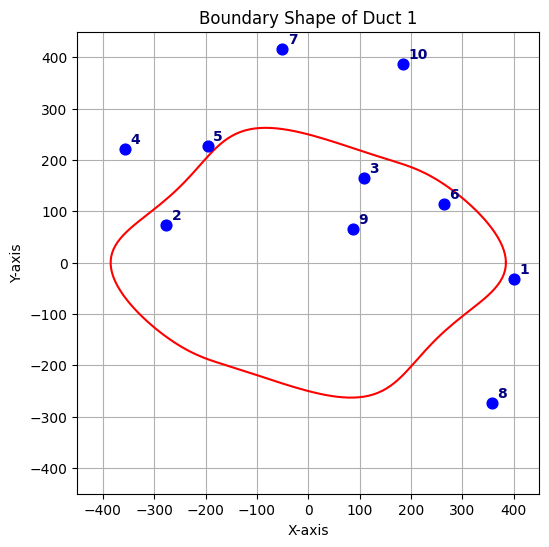

In [6]:
# Generate 10 random points
np.random.seed(37)
axis_size = 450
random_points = np.random.uniform(-axis_size, axis_size, (10, 2))

#----------------------------

duct1_pts = generate_boundary_shape(350, 250, 0.1, 4, 200)
fig, ax = plt.subplots(figsize=(6, 6))

# plot as a plain line: no marker, just a solid linestyle
ax.plot(
    [p[0] for p in duct1_pts],
    [p[1] for p in duct1_pts],
    linestyle='-',       # solid line
    marker=None,         # no markers at the points
    linewidth=1.5,       # you can adjust line width
    color='red'
)

# Plot the random points
ax.scatter(random_points[:,0],
           random_points[:,1],
           s=60, color='blue', zorder=5, label='Random Points')

# Annotate each random point with its index

for i, (x,y) in enumerate(random_points, start=1):
    ax.annotate(
        str(i),        # the label
        (x, y),        # point to label
        textcoords="offset points",
        xytext=(4,4),  # shift label a little
        fontsize=10,
        fontweight='bold',
        color='navy'
    )

# set fixed axes limits
ax.set_xlim(-axis_size, axis_size)
ax.set_ylim(-axis_size, axis_size)

ax.set_aspect('equal', adjustable='box')  # keep x/y scales the same
ax.set_title('Boundary Shape of Duct 1')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True)

plt.show()



In [7]:
# print(random_points)
# print(random_points[0])

for i, (x, y) in enumerate(random_points, start=1):
    if is_inside(x, y, duct1_pts):
        print(f"Point {i}: is INSIDE the boundary shape.")
    else:
        print(f"Point {i}: is OUTSIDE the boundary shape.")

Point 1: is OUTSIDE the boundary shape.
Point 2: is INSIDE the boundary shape.
Point 3: is INSIDE the boundary shape.
Point 4: is OUTSIDE the boundary shape.
Point 5: is OUTSIDE the boundary shape.
Point 6: is INSIDE the boundary shape.
Point 7: is OUTSIDE the boundary shape.
Point 8: is OUTSIDE the boundary shape.
Point 9: is INSIDE the boundary shape.
Point 10: is OUTSIDE the boundary shape.


_______
# Test 2


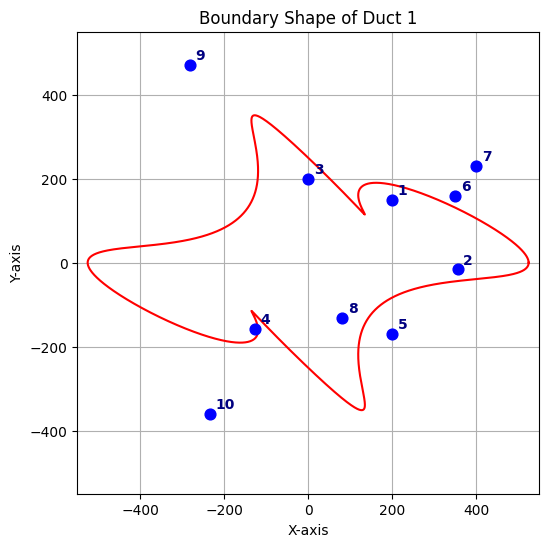

In [11]:
# Generate 10 random points
np.random.seed(8)
axis_size = 550
random_points2 = np.random.uniform(-axis_size-50, axis_size-50, (10, 2))
random_points2[0] = [200,150]
random_points2[5] = [350,160]
random_points2[6] = [400,230]
random_points2[4] = [200,-170]
random_points2[2] = [0,200]

#----------------------------

duct2_pts = generate_boundary_shape(350,250,.5,4,200000)
fig, ax = plt.subplots(figsize=(6, 6))

# plot as a plain line: no marker, just a solid linestyle
ax.plot(
    [p[0] for p in duct2_pts],
    [p[1] for p in duct2_pts],
    linestyle='-',       # solid line
    marker=None,         # no markers at the points
    linewidth=1.5,       # you can adjust line width
    color='red'
)

# Plot the random points
ax.scatter(random_points2[:,0],
           random_points2[:,1],
           s=60, color='blue', zorder=5, label='Random Points')

# Annotate each random point with its index

for i, (x,y) in enumerate(random_points2, start=1):
    ax.annotate(
        str(i),        # the label
        (x, y),        # point to label
        textcoords="offset points",
        xytext=(4,4),  # shift label a little
        fontsize=10,
        fontweight='bold',
        color='navy'
    )

# set fixed axes limits
ax.set_xlim(-axis_size, axis_size)
ax.set_ylim(-axis_size, axis_size)

ax.set_aspect('equal', adjustable='box')  # keep x/y scales the same
ax.set_title('Boundary Shape of Duct 1')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True)

plt.show()



In [9]:
# print(random_points)
# print(random_points[0])

for i, (x, y) in enumerate(random_points2, start=1):
    if is_inside(x, y, duct2_pts):
        print(f"Point {i}: is INSIDE the boundary shape.")
    else:
        print(f"Point {i}: is OUTSIDE the boundary shape.")

Point 1: is INSIDE the boundary shape.
Point 2: is INSIDE the boundary shape.
Point 3: is INSIDE the boundary shape.
Point 4: is INSIDE the boundary shape.
Point 5: is OUTSIDE the boundary shape.
Point 6: is OUTSIDE the boundary shape.
Point 7: is OUTSIDE the boundary shape.
Point 8: is INSIDE the boundary shape.
Point 9: is OUTSIDE the boundary shape.
Point 10: is OUTSIDE the boundary shape.
